In [1]:
import requests
import json
import os
import pydicom
from pydicom.dataelem import DataElement
import base64
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from presidio_image_redactor import DicomImageRedactorEngine
import datetime

In [2]:
# Load in and process your DICOM file as needed
dicom_instance = pydicom.dcmread('0_ORIGINAL.dcm')


In [3]:
# Single DICOM (.dcm) file or directory containing DICOM files
input_path = 'dicom/'

# Directory where the output will be written
output_parent_dir = 'output/'

engine = DicomImageRedactorEngine()

# Performance Test Batch Processing

In [64]:
# Redact text PHI from DICOM images
time1 = datetime.datetime.now()
engine.redact_from_directory(
    input_dicom_path = input_path,
    output_dir = output_parent_dir,
    fill="contrast",
    save_bboxes=True # if True, saves the redacted region bounding box info to .json files in the output dir
)
time2 = datetime.datetime.now()

/home/olonok/miniconda3/envs/pii/lib/python3.11/site-packages/presidio_image_redactor/dicom_image_redactor_engine.py:345: RuntimeWarning: invalid value encountered in divide
  (image_2d_float.max() - image_2d_float)
/home/olonok/miniconda3/envs/pii/lib/python3.11/site-packages/presidio_image_redactor/dicom_image_redactor_engine.py:350: RuntimeWarning: invalid value encountered in cast
  image_2d_scaled = np.uint8(image_2d_scaled)
/home/olonok/miniconda3/envs/pii/lib/python3.11/site-packages/presidio_image_redactor/dicom_image_redactor_engine.py:345: RuntimeWarning: invalid value encountered in divide
  (image_2d_float.max() - image_2d_float)
/home/olonok/miniconda3/envs/pii/lib/python3.11/site-packages/presidio_image_redactor/dicom_image_redactor_engine.py:350: RuntimeWarning: invalid value encountered in cast
  image_2d_scaled = np.uint8(image_2d_scaled)
/home/olonok/miniconda3/envs/pii/lib/python3.11/site-packages/presidio_image_redactor/dicom_image_redactor_engine.py:345: RuntimeWar

Output written to output/dicom


In [74]:
(time2 - time1).microseconds 

592165

In [80]:
time_batch = ((time2 - time1).seconds * 1000000 + (time2 - time1).microseconds )/ 1000000

In [84]:
import os
import requests
import base64

def process_dicom_files(input_folder, output_folder):
    """
    Iterates through a folder with subfolders, processes DICOM files,
    and saves the redacted results to a local folder.

    Args:
        input_folder (str): Path to the input folder containing DICOM files.
        output_folder (str): Path to the output folder to save redacted DICOM files.
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.dcm', '.dicom', 'DCM')):
                input_filepath = os.path.join(root, file)
                relative_path = os.path.relpath(input_filepath, input_folder) # get the relative path
                output_filepath = os.path.join(output_folder, relative_path)

                # Create the output subdirectories if they don't exist
                os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

                try:
                    url = "https://ai.demo.datadetect.com/pii_dicom/process-dicom-image"
                    with open(input_filepath, 'rb') as f:
                        files = {'file': f}
                        r = requests.post(url, files=files)
                        r.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
                        out = r.json()

                    encoded_dicom = out['redacted_instance']
                    decoded_dicom = base64.b64decode(encoded_dicom)

                    with open(output_filepath, 'wb') as f:
                        f.write(decoded_dicom)

                    print(f"Processed and saved: {output_filepath}")

                except requests.exceptions.RequestException as e:
                    print(f"Error processing {input_filepath}: {e}")
                except (KeyError, ValueError, TypeError) as e:
                    print(f"Error processing {input_filepath}: Invalid API response: {e}")
                except Exception as e:
                    print(f"An unexpected error occurred while processing {input_filepath}: {e}")

# Example usage:
input_folder = "dicom"  # Replace with your input folder path
output_folder = "output/dicon_online/" # Replace with your output folder path
time3 = datetime.datetime.now()
process_dicom_files(input_folder, output_folder)
time4 = datetime.datetime.now()

Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-001/06-26-2003-NA-XR CHEST AP PORTABLE-96544/1001.000000-NA-42825/1-1.dcm
Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-001/06-26-2003-NA-XR CHEST AP PORTABLE-96544/1002.000000-NA-96023/1-1.dcm
Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-1.dcm
Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-2.dcm
Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-3.dcm
Processed and saved: output/dicon_online/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-4.dcm
Processed and saved: output/dicon_

In [85]:
time_batch = ((time4 - time3).seconds * 1000000 + (time4 - time3).microseconds )/ 1000000

In [83]:
time_batch

5283.009581

In [55]:
dicom_instance.pixel_array.shape

(1760, 2140)

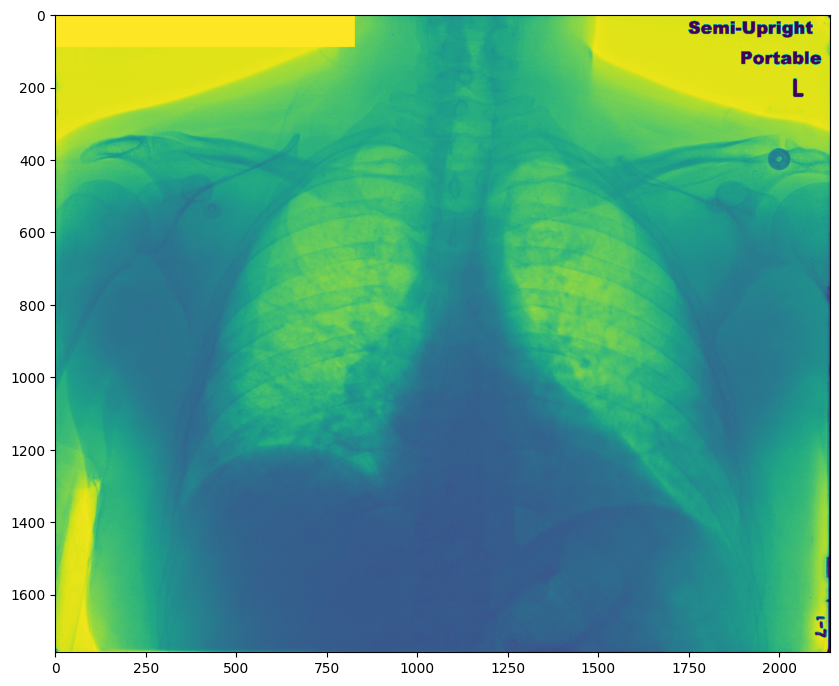

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance.pixel_array)

In [97]:
# Example usage:
input_folder = "dicom_modified"  # Replace with your input folder path
output_folder = "output/dicon_online2/" # Replace with your output folder path
time5 = datetime.datetime.now()
process_dicom_files(input_folder, output_folder)
time6 = datetime.datetime.now()

Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-001/06-26-2003-NA-XR CHEST AP PORTABLE-96544/1001.000000-NA-42825/1-1.dcm
Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-001/06-26-2003-NA-XR CHEST AP PORTABLE-96544/1002.000000-NA-96023/1-1.dcm
Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-1.dcm
Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-2.dcm
Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-3.dcm
Processed and saved: output/dicon_online2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-002/06-18-1991-NA-NA-65823/3001578.000000-NA-11908/1-4.dcm
Processed and saved: output/

In [98]:
time_batch = ((time6 - time5).seconds * 1000000 + (time6 - time5).microseconds )/ 1000000
print(f"Time taken for batch processing: {time_batch} seconds")


Time taken for batch processing: 5845.010997 seconds
